In [108]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
np.random.seed(42)


In [65]:
mean = [0] * 3
cov = np.array([
    [1, 0.8, 0.7],
    [0.8, 1.5, 0.9],
    [0.7, 0.9, 2],
])

multi_variate_normal_dist = np.random.multivariate_normal(mean, cov, 100)
multi_variate_normal_dist

array([[ 3.56568911e-02,  3.88076606e-01, -2.10910247e+00],
       [ 1.99183738e-01, -1.10693201e+00, -9.25912298e-01],
       [ 7.18250938e-01,  1.22461426e+00,  3.84305820e-01],
       [ 2.14811125e-01,  2.47266939e-02,  1.05108879e-02],
       [ 9.95579041e-01, -3.38531164e-01, -4.14120001e-02],
       [-6.91744083e-01, -3.62704171e-01, -1.80312700e+00],
       [ 1.48748218e+00,  1.12497250e+00,  4.25264545e-01],
       [-1.47360822e+00, -1.76578902e+00, -1.40329109e+00],
       [ 1.65111260e+00,  1.10221757e+00,  2.27304084e+00],
       [ 4.88259890e-01,  9.05549269e-01,  1.43509562e-01],
       [-6.13971792e-01, -1.00279412e+00,  3.82415554e-01],
       [ 1.38819538e+00,  3.56723141e+00,  3.86854652e+00],
       [-4.10163817e-01, -9.77897509e-01, -2.03560025e+00],
       [-5.94731947e-01, -2.73076106e+00, -1.27498988e+00],
       [-2.07748483e-01, -1.50535008e+00, -1.01910375e+00],
       [ 2.41770575e-01,  9.01137193e-01,  1.94791673e+00],
       [ 6.75682398e-01, -4.91621967e-01

In [37]:
A = np.cov(multi_variate_normal_dist, rowvar=False)
A

array([[1.08697774, 0.72497438, 0.50527999],
       [0.72497438, 1.25096552, 0.5834363 ],
       [0.50527999, 0.5834363 , 1.4450752 ]])

In [44]:
v = np.random.rand(3,1)
v

array([[0.66168429],
       [0.48398937],
       [0.00531348]])

In [ ]:
#iteration alg
max_iter = 1000
tol = pow(10, -6)
converged = False

while not converged:
    v_new = np.dot(A, v)
    print(f"cal v_new\n {v_new}\n")
    v_new /= np.linalg.norm(v_new)
    print(f"normalised v_new \n{v_new}\n")
    if np.linalg.norm(v_new-v) < tol:
        print(f"normalised v_new and v {np.linalg.norm(v_new-v)}")
        break
    v = v_new

# estimate the dominat eigen value v.T * A * v , v is the dominant eigenvector
lam = np.dot(v.T, np.dot(A,v))
print("estimated dominant eigen value", lam.item())

cal v_new
 [[1.31420628]
 [1.4841787 ]
 [1.48378736]]

normalised v_new 
[[0.53073584]
 [0.59937838]
 [0.59922034]]

normalised v_new and v 5.80864603863588e-07
estimated dominant eigen value 2.4761965731069906


In [61]:
eig_val, eig_vec = np.linalg.eig(A)
assert round(lam.item(), 4) == round(eig_val[0], 4)

In [145]:
# projection onto the dominant eigen vector
projections = np.matmul(multi_variate_normal_dist, v.flatten())

# re-projection back to 3D for plotting purposes
projections = projections[:, np.newaxis]* v.flatten()

<Figure size 640x480 with 0 Axes>

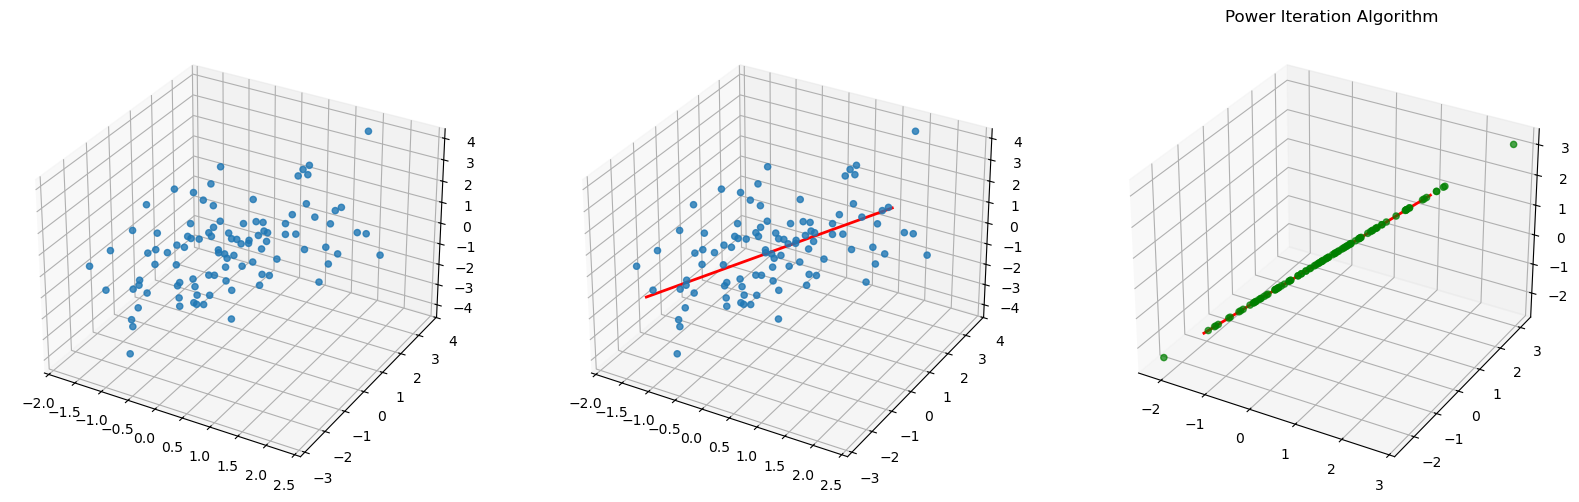

In [150]:
fig = plt.figure()
fig, (axl, axc, axr) = plt.subplots(1, 3, subplot_kw={'projection': '3d'}, figsize=(20,20))

axl.scatter(multi_variate_normal_dist[:, 0], multi_variate_normal_dist[:, 1], multi_variate_normal_dist[:, 2], alpha=0.8)

# scaling the eigenvector
k= 3

axc.scatter(multi_variate_normal_dist[:, 0], multi_variate_normal_dist[:, 1], multi_variate_normal_dist[:, 2], alpha=0.8)

axc.plot(
    [-k*v[0], k*v[0]],
    [-k*v[1], k*v[1]],
    [-k*v[2], k*v[2]],
    linewidth=2,
    color="red",
    label="Principal Component"
    )

# ax.add_patch(arrow)
axr.scatter(projections[: , 0], projections[: , 1], projections[: , 2], color='green', alpha=0.7, label="projected points")

axr.plot(
    [-k*v[0], k*v[0]],
    [-k*v[1], k*v[1]],
    [-k*v[2], k*v[2]],
    linewidth=2,
    color="red"
    )

plt.title("Power Iteration Algorithm")
plt.show()